In [537]:
%matplotlib inline 
import numpy as np 
import scipy as sp 
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import pandas as pd 
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
import string
import math
import sys
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import sklearn
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [538]:
train = pd.read_csv('../input/titanic/train.csv')
Test = pd.read_csv("../input/titanic/test.csv")

combine = [train, Test]
combined = pd.concat(combine)

In [539]:
train.tail()
train.info()

print('_'*40)

Test.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [540]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [541]:
print('Train columns with null values:',train.isnull().sum(), sep = '\n')
print("-"*42)


print('Test/Validation columns with null values:', Test.isnull().sum(),sep = '\n')
print("-"*42)

Train columns with null values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------------------------------------
Test/Validation columns with null values:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
------------------------------------------


In [542]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Meyer, Mrs. Edgar Joseph (Leila Saks)",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


[Text(0, 0, 'Not Survived'), Text(0, 0, 'Survived')]

Text(0, 0.5, 'Frequency Count')

Text(0.5, 1.0, 'Count of Survival')

Text(0.0, 274.5, '549(62%)')

Text(1.0, 171.0, '342(38%)')

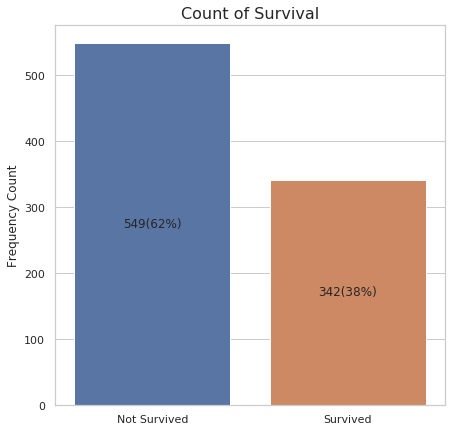

In [543]:
figure, survive_bar = plt.subplots(figsize=(7, 7))
sns.barplot(x= train["Survived"].value_counts().index, y = train["Survived"].value_counts(), ax = survive_bar)
survive_bar.set_xticklabels(['Not Survived', 'Survived'])
survive_bar.set_ylabel('Frequency Count')
survive_bar.set_title('Count of Survival', fontsize = 16)

for patch in survive_bar.patches:
    label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
    label_y = patch.get_y() + patch.get_height()/2
    survive_bar.text(label_x, label_y,
                #left - freq below - rel freq wrt population as a percentage
               str(int(patch.get_height())) + '(' +
               '{:.0%}'.format(patch.get_height()/len(train.Survived))+')',
               horizontalalignment='center', verticalalignment='center')

[Text(0, 0, 'Southampton'), Text(0, 0, 'Chernboug'), Text(0, 0, 'Queenstown')]

Text(0, 0.5, 'Frequency Count')

Text(0.5, 1.0, 'Where did the passengers board the Titanic?')

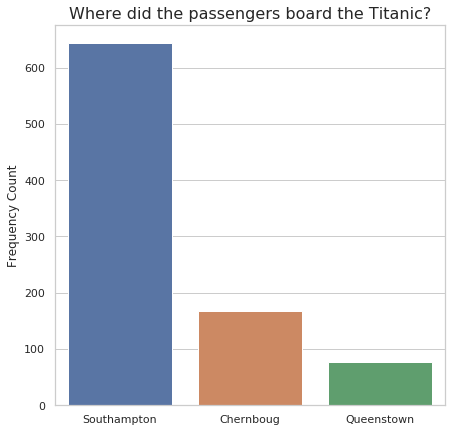

In [544]:
figure, embarked_bar = plt.subplots(figsize=(7, 7))
sns.barplot(x= train["Embarked"].value_counts().index, y = train["Embarked"].value_counts(), ax = embarked_bar)
embarked_bar.set_xticklabels(['Southampton', 'Chernboug', 'Queenstown'])
embarked_bar.set_ylabel('Frequency Count')
embarked_bar.set_title('Where did the passengers board the Titanic?', fontsize = 16)

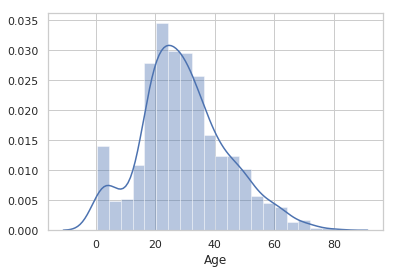

In [545]:
null_ages = pd.isnull(train.Age)
known_ages = pd.notnull(train.Age)
preimputation = train.Age[known_ages]
sns.distplot(preimputation)

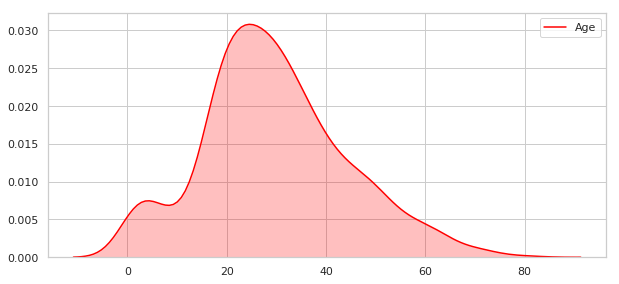

In [546]:
# Age Distribution
figure, myaxis = plt.subplots(figsize=(10, 4.5))

sns.kdeplot(data=train["Age"], kernel='gau', ax=myaxis, color="Red", shade=True, legend=True)

(7, 0)

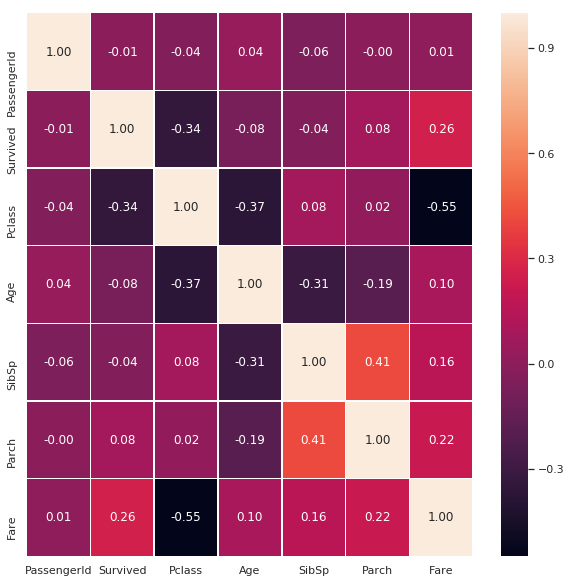

In [547]:
#Heatmap 
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train.corr(), annot=True, linewidths=0.5, fmt='.2f',ax=ax)
ax.set_ylim(7, 0)

In [548]:
def print_percentage(df,col_name,col_values):
    for x in col_values:
        group = df.loc[df[col_name]==x]
        print ('{0} survival rate: {1:.3f}'.format(x, (group['Survived'].sum()/group.shape[0])))

In [549]:
print_percentage(train,'Sex',["male","female"])

male survival rate: 0.189
female survival rate: 0.742


Text(0.5, 1.0, 'Survived/Non-Survived Passenger Gender Distribution')

Text(0.5, 0, 'Sex')

Text(0, 0.5, 'Proportion of passengers survived')

Text(0.0, 0.09445407279029462, '18.891%')

Text(1.0, 0.37101910828025475, '74.204%')

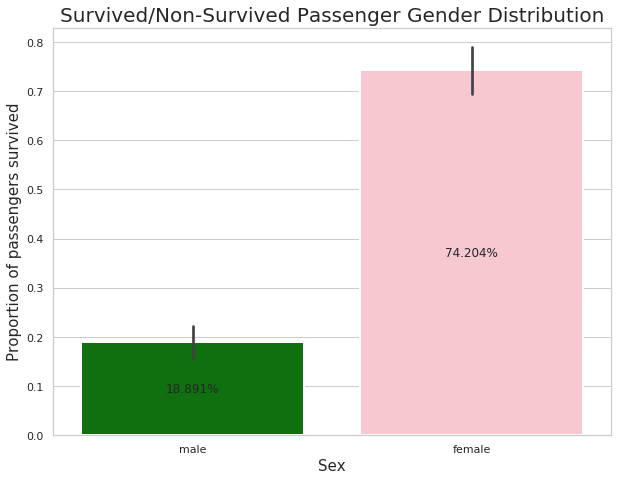

In [550]:
figure, myaxis = plt.subplots(figsize=(10, 7.5))

sns.barplot(x = "Sex", 
            y = "Survived", 
            data=train, 
            ax = myaxis,
            estimator = np.mean,
            palette = {'male':"green", 'female':"Pink"},
            linewidth=2)

myaxis.set_title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 20)
myaxis.set_xlabel("Sex",fontsize = 15)
myaxis.set_ylabel("Proportion of passengers survived", fontsize = 15)

for patch in myaxis.patches:
    label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
    label_y = patch.get_y() + patch.get_height()/2
    myaxis.text(label_x, label_y,
                #left - freq below - rel freq wrt population as a percentage
                '{:.3%}'.format(patch.get_height()),
               horizontalalignment='center', verticalalignment='center')

Text(0.5, 1.0, 'Passenger Gender Distribution - Survived vs Not-survived')

Text(0.5, 0, 'Sex')

Text(0, 0.5, 'Number of Passenger Survived')

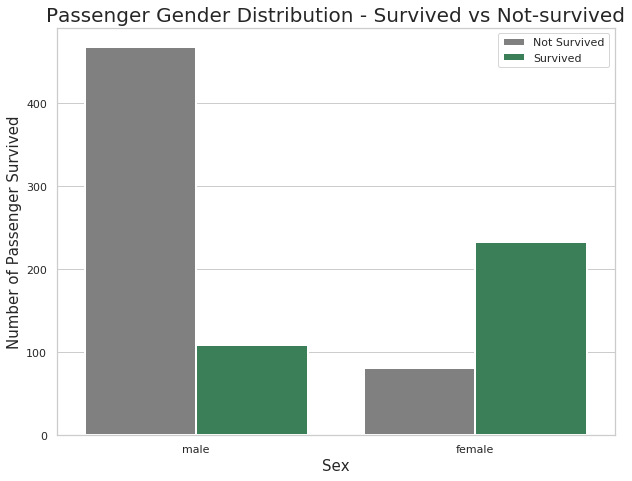

In [551]:
figure, myaxis = plt.subplots(figsize=(10, 7.5))

sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = train, 
                   linewidth=2, 
                   palette = {1:"seagreen", 0:"gray"}, ax = myaxis)


## Fixing title, xlabel and ylabel
myaxis.set_title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 20)
myaxis.set_xlabel("Sex", fontsize = 15);
myaxis.set_ylabel("Number of Passenger Survived", fontsize = 15)
myaxis.legend(["Not Survived", "Survived"], loc = 'upper right')

In [552]:
print_percentage(train,'Pclass',[1,2,3])

1 survival rate: 0.630
2 survival rate: 0.473
3 survival rate: 0.242


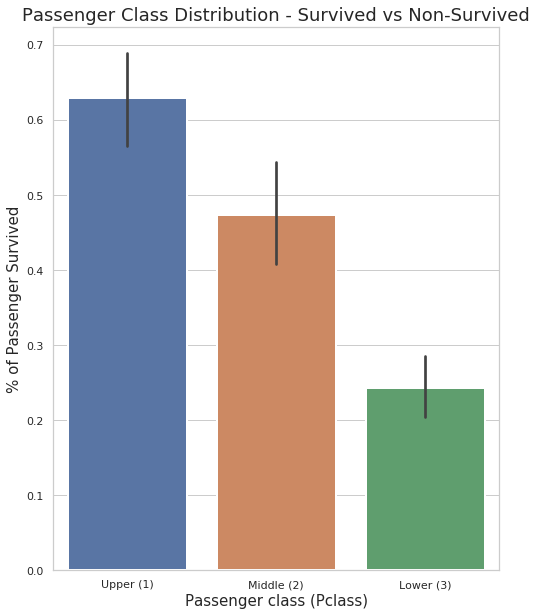

In [553]:
#Barplot
figure, pclass_bar = plt.subplots(figsize = (8,10))
sns.barplot(x = "Pclass", 
            y = "Survived", 
            estimator = np.mean,
            data=train, 
            ax = pclass_bar,
            linewidth=2)
pclass_bar.set_title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 18)
pclass_bar.set_xlabel("Passenger class (Pclass)", fontsize = 15);
pclass_bar.set_ylabel("% of Passenger Survived", fontsize = 15);
labels = ['Upper (1)', 'Middle (2)', 'Lower (3)']
val = [0,1,2]  
pclass_bar.set_xticklabels(labels);




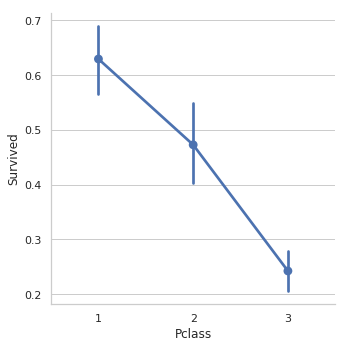

In [554]:
#Line Plot
sns.catplot('Pclass', 'Survived', kind='point', data=train)


Text(0.5, 0.98, 'How many Men and Women Survived by Passenger Class')

Text(0.0, 0.18442622950819673, '36.885%')

Text(1.0, 0.48404255319148937, '96.809%')

Text(0.0, 0.0787037037037037, '15.741%')

Text(1.0, 0.4605263157894737, '92.105%')

Text(0.0, 0.06772334293948126, '13.545%')

Text(1.0, 0.25, '50.000%')

Text(-0.2, 0.18442622950819673, '36.885%')

Text(0.8, 0.0787037037037037, '15.741%')

Text(1.8, 0.06772334293948126, '13.545%')

Text(0.2, 0.48404255319148937, '96.809%')

Text(1.2, 0.4605263157894737, '92.105%')

Text(2.2, 0.25, '50.000%')

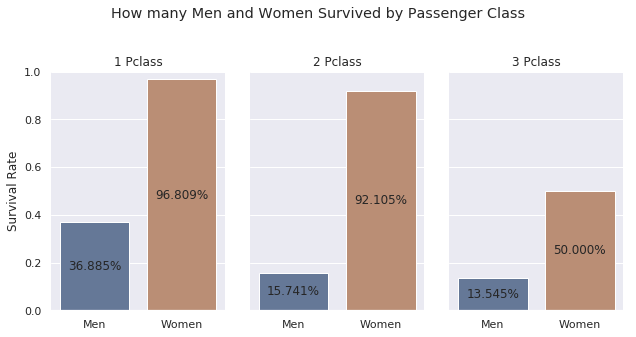

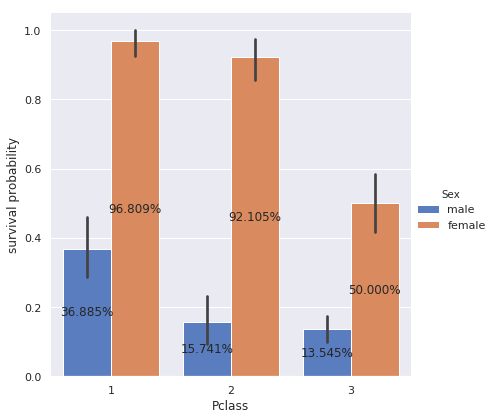

In [555]:
sns.set(font_scale=1)
g = sns.catplot(x="Sex", y="Survived", col="Pclass",
                    data=train, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class');

for myaxis in g.axes[0]:
    for patch in myaxis.patches:
        label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
        label_y = patch.get_y() + patch.get_height()/2
        myaxis.text(label_x, label_y,
                    #left - freq below - rel freq wrt population as a percentage
                    '{:.3%}'.format(patch.get_height()),
                   horizontalalignment='center', verticalalignment='center')

#Another plot that gives the exact same result 
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=train,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

myaxis = g.ax
for patch in myaxis.patches:
    label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
    label_y = patch.get_y() + patch.get_height()/2
    myaxis.text(label_x, label_y,
                #left - freq below - rel freq wrt population as a percentage
                '{:.3%}'.format(patch.get_height()),
               horizontalalignment='center', verticalalignment='center')

In [556]:
print_percentage(train,'Embarked',['S','C','Q'])

S survival rate: 0.337
C survival rate: 0.554
Q survival rate: 0.390


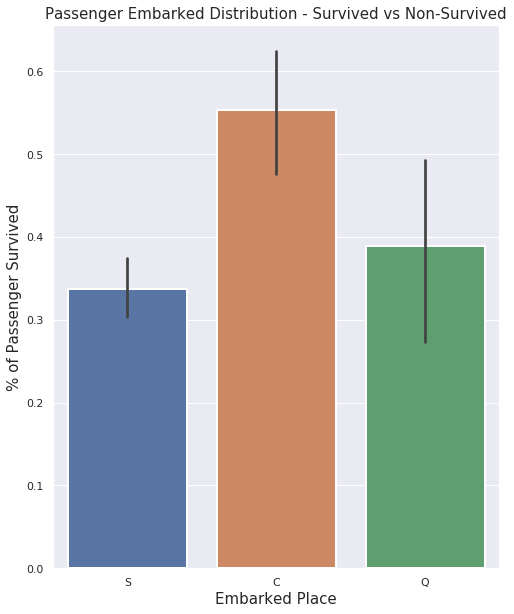

In [557]:
figure, embarked_bar = plt.subplots(figsize = (8,10))
sns.barplot(x = "Embarked", 
            y = "Survived", 
            estimator = np.mean,
            data=train, 
            ax = embarked_bar,
            linewidth=2)
embarked_bar.set_title("Passenger Embarked Distribution - Survived vs Non-Survived", fontsize = 15)
embarked_bar.set_xlabel("Embarked Place", fontsize = 15);
embarked_bar.set_ylabel("% of Passenger Survived", fontsize = 15);



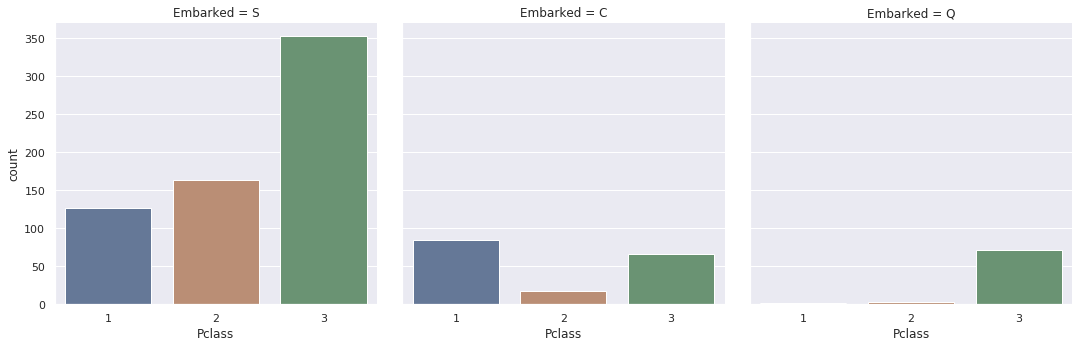

In [558]:
sns.set(font_scale=1)
g = sns.catplot(x="Pclass", col="Embarked",
                    data=train, saturation=.5,
                    kind="count", ci=None)

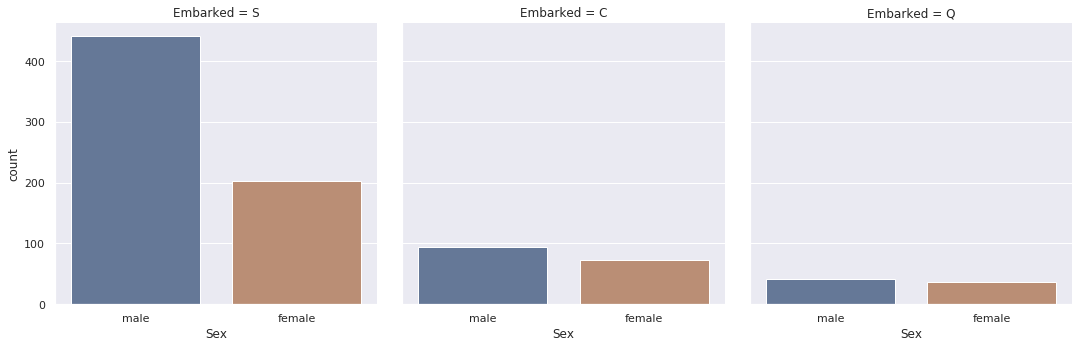

In [559]:
sns.set(font_scale=1)
g = sns.catplot(x="Sex", col="Embarked",
                    data=train, saturation=.5,
                    kind="count", ci=None)

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Probability Density')

Text(0.5, 1.0, 'Superimposed KDE plot for age of Survived and Not Survived')

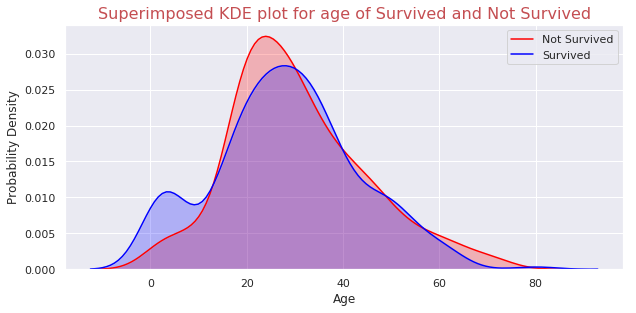

In [560]:
# Age distibution
figure, myaxis = plt.subplots(figsize=(10, 4.5))

sns.kdeplot(data=train["Age"][(train["Survived"] == 0) & (
    train["Age"].notnull())], kernel='gau', ax=myaxis, color="Red", shade=True, legend=True)

#KDE Map
sns.kdeplot(data=train["Age"][(train["Survived"] == 1) & (
    train["Age"].notnull())], kernel='gau', ax=myaxis, color="Blue", shade=True, legend=True)

myaxis.set_xlabel("Age")
myaxis.set_ylabel("Probability Density")
myaxis.legend(["Not Survived", "Survived"], loc='upper right')
myaxis.set_title("Superimposed KDE plot for age of Survived and Not Survived",
                 loc='center', fontdict={'fontsize': 16}, color='r')

Text(0.5, 0.98, 'Survived by Sex and Age')

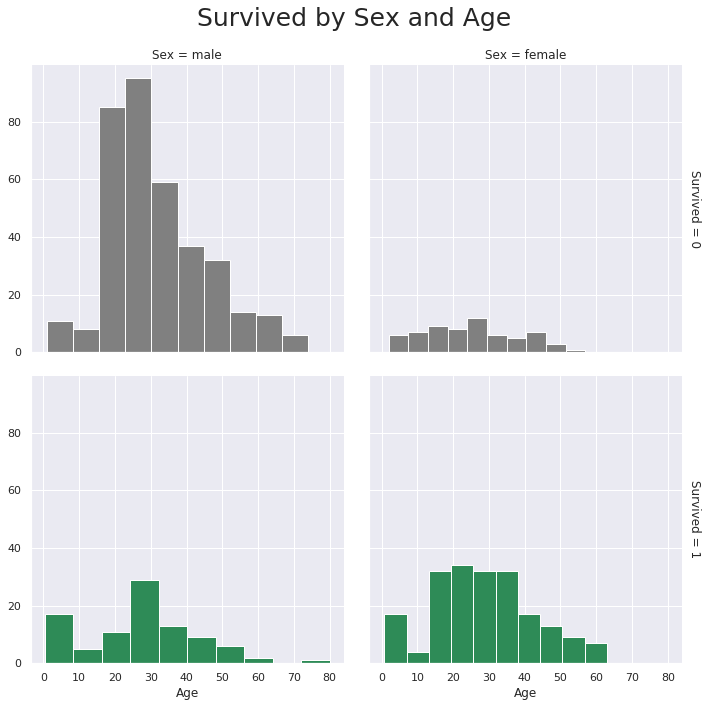

In [561]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(train,size=5, col="Sex", row="Survived", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

Text(0.5, 0.98, 'Survived by Sex and Age')

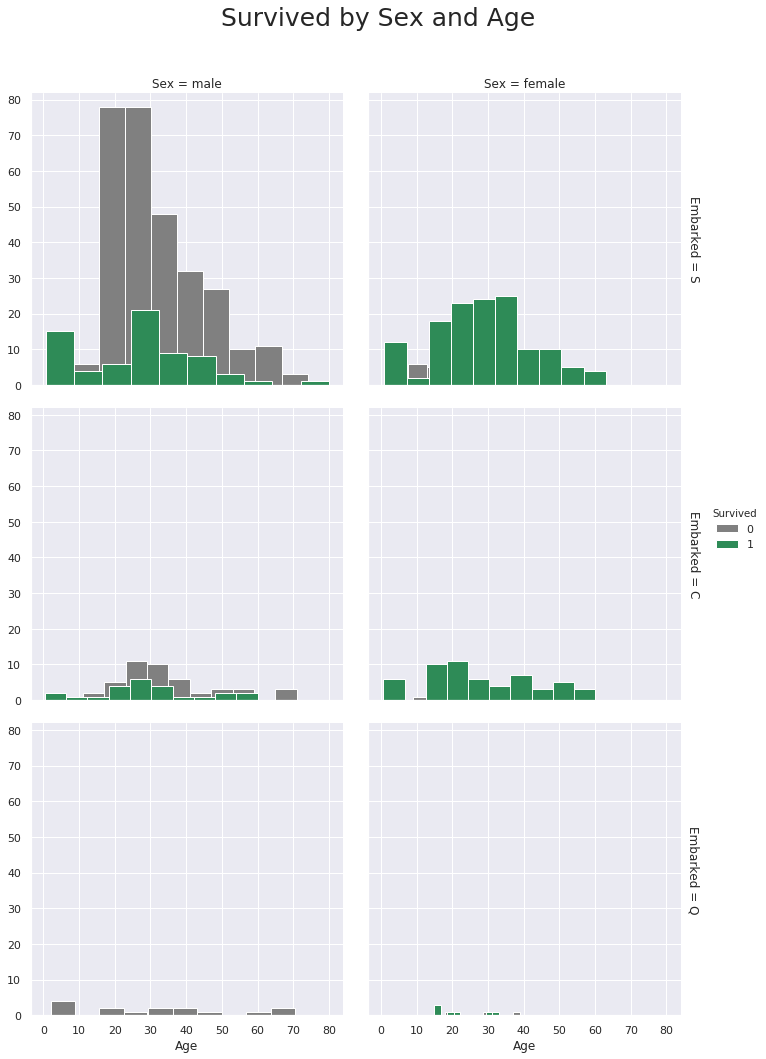

In [562]:
g = sns.FacetGrid(train,size=5, col="Sex", row="Embarked", margin_titles=True, hue = "Survived",
                  palette = pal
                  )
g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend();
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

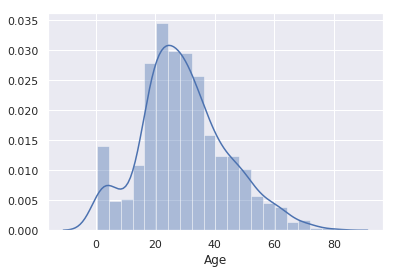

In [563]:
null_ages = pd.isnull(train.Age)
known_ages = pd.notnull(train.Age)
preimputation = train.Age[known_ages]
sns.distplot(preimputation)

Text(0.5, 0, 'Fare')

Text(0, 0.5, 'Probability Density')

Text(0.5, 1.0, 'Superimposed KDE plot for Fare of Survived and Not Survived')

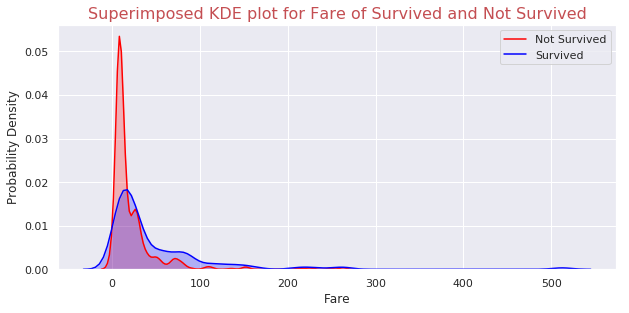

In [564]:
# Explore Age distibution
figure, fare = plt.subplots(figsize=(10, 4.5))

sns.kdeplot(data=train.loc[(train['Survived'] == 0),'Fare'], kernel='gau', ax=fare, color="Red", shade=True, legend=True)

sns.kdeplot(data=train.loc[(train['Survived'] == 1),'Fare'], kernel='gau', ax=fare, color="Blue", shade=True, legend=True)

fare.set_xlabel("Fare")
fare.set_ylabel("Probability Density")
fare.legend(["Not Survived", "Survived"], loc='upper right')
fare.set_title("Superimposed KDE plot for Fare of Survived and Not Survived",
                 loc='center', fontdict={'fontsize': 16}, color='r')

Text(0.5, 0, 'Fare')

Text(0, 0.5, 'Probability Density')

Text(0.5, 1.0, 'Superimposed distribution plot for Fare of Survived and Not Survived')

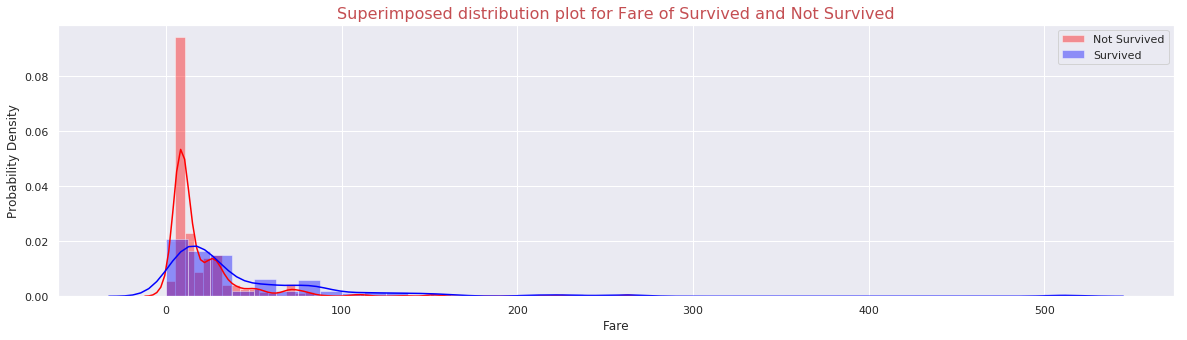

In [565]:
figure, fare = plt.subplots(figsize=(20, 5))
sns.distplot(train.loc[(train['Survived'] == 0),'Fare'], hist=True, color='red', ax=fare)
sns.distplot(train.loc[(train['Survived'] == 1),'Fare'], hist=True, color='blue', ax=fare)

fare.set_xlabel("Fare")
fare.set_ylabel("Probability Density")
fare.legend(["Not Survived", "Survived"], loc='upper right')
fare.set_title("Superimposed distribution plot for Fare of Survived and Not Survived",
                 loc='center', fontdict={'fontsize': 16}, color='r')

In [566]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [567]:
print_percentage(train,'Parch',[0,1,2,3,4,5,6])

0 survival rate: 0.344
1 survival rate: 0.551
2 survival rate: 0.500
3 survival rate: 0.600
4 survival rate: 0.000
5 survival rate: 0.200
6 survival rate: 0.000


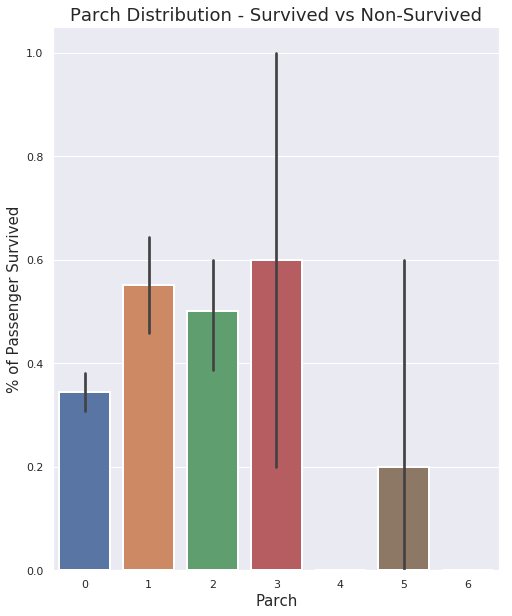

In [568]:
figure, parch_bar = plt.subplots(figsize = (8,10))
sns.barplot(x = "Parch", 
            y = "Survived", 
            estimator = np.mean,
            data=train, 
            ax = parch_bar,
            linewidth=2)
parch_bar.set_title("Parch Distribution - Survived vs Non-Survived", fontsize = 18)
parch_bar.set_xlabel("Parch", fontsize = 15);
parch_bar.set_ylabel("% of Passenger Survived", fontsize = 15);

Text(0.5, 1.0, 'Passenger Parch Distribution - Survived vs Not-survived')

Text(0.5, 0, 'Parch')

Text(0, 0.5, 'Number of Passenger Survived')

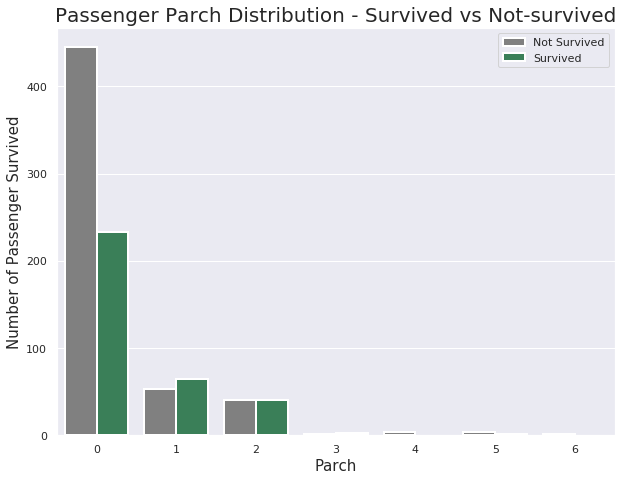

In [569]:
figure, myaxis = plt.subplots(figsize=(10, 7.5))

sns.countplot(x = "Parch", 
                   hue="Survived",
                   data = train, 
                   linewidth=2, 
                   palette = {1:"seagreen", 0:"gray"}, ax = myaxis)

myaxis.set_title("Passenger Parch Distribution - Survived vs Not-survived", fontsize = 20)
myaxis.set_xlabel("Parch", fontsize = 15);
myaxis.set_ylabel("Number of Passenger Survived", fontsize = 15)
myaxis.legend(["Not Survived", "Survived"], loc = 'upper right')

In [570]:
# sns.set(font_scale=1)
# g = sns.catplot(x="SibSp", y="Survived", col="Parch",
#                     data=train, saturation=.5,
#                     kind="bar", ci=None, aspect=.6)
# (g.set_axis_labels("", "Survival Rate")
#     .set_xticklabels(["Men", "Women"])
#     .set_titles("{col_name} {col_var}")
#     .set(ylim=(0, 1))
#     .despine(left=True))  
# plt.subplots_adjust(top=0.8)
# g.fig.suptitle('How many Men and Women Survived by Passenger Class');



In [571]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [572]:
print_percentage(train,'SibSp',[0,1,2,3,4,5,8])

0 survival rate: 0.345
1 survival rate: 0.536
2 survival rate: 0.464
3 survival rate: 0.250
4 survival rate: 0.167
5 survival rate: 0.000
8 survival rate: 0.000


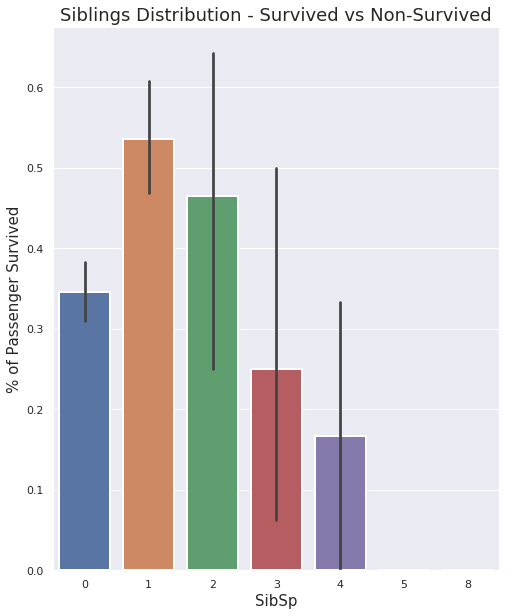

In [573]:
figure, parch_bar = plt.subplots(figsize = (8,10))
sns.barplot(x = "SibSp", 
            y = "Survived", 
            estimator = np.mean,
            data=train, 
            ax = parch_bar,
            linewidth=2)
parch_bar.set_title("Siblings Distribution - Survived vs Non-Survived", fontsize = 18)
parch_bar.set_xlabel("SibSp", fontsize = 15);
parch_bar.set_ylabel("% of Passenger Survived", fontsize = 15);

Text(0.5, 1.0, 'Siblings Distribution - Survived vs Not-survived')

Text(0.5, 0, 'Siblings')

Text(0, 0.5, 'Number of Passenger Survived')

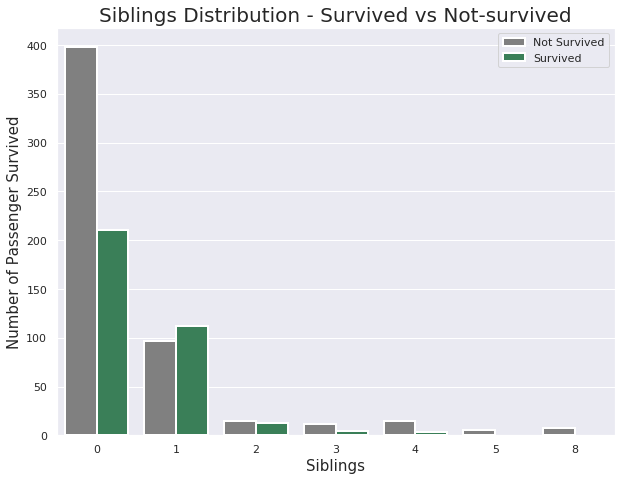

In [574]:
figure, myaxis = plt.subplots(figsize=(10, 7.5))

sns.countplot(x = "SibSp", 
                   hue="Survived",
                   data = train, 
                   linewidth=2, 
                   palette = {1:"seagreen", 0:"gray"}, ax = myaxis)

myaxis.set_title("Siblings Distribution - Survived vs Not-survived", fontsize = 20)
myaxis.set_xlabel("Siblings", fontsize = 15);
myaxis.set_ylabel("Number of Passenger Survived", fontsize = 15)
myaxis.legend(["Not Survived", "Survived"], loc = 'upper right')

In [575]:
# Missing Fare Values
print('Amount of missing data in Fare for training set:', train.Fare.isnull().sum())
print('Amount of missing data in Fare for test set:', Test.Fare.isnull().sum())

Amount of missing data in Fare for training set: 0
Amount of missing data in Fare for test set: 1


In [576]:
Test[Test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [577]:
median_fare = Test.groupby(['Pclass', 'Parch']).Fare.median()[3][0]
# Filling the missing value in Fare with the median Fare of 3rd class passenger who has Parch 0.
Test['Fare'] = Test['Fare'].fillna(median_fare)

Text(0.5, 0, 'Fare')

Text(0, 0.5, 'Probability Density')

Text(0.5, 1.0, 'Superimposed distribution plot for Fare of Training set vs Test set')

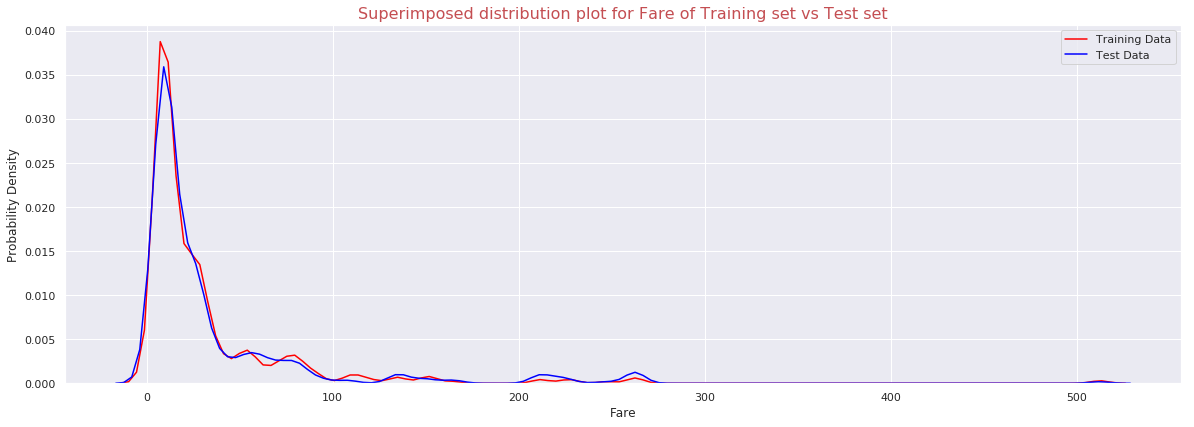

In [578]:
figure, fare = plt.subplots(figsize=(20, 6.6))
sns.distplot(train.Fare, hist=False,  color='red', label = "Training Data",ax=fare)
sns.distplot(Test.Fare, hist=False, label = "Test Data", color='blue', ax=fare)

fare.set_xlabel("Fare")
fare.set_ylabel("Probability Density")
fare.legend(["Training Data", "Test Data"], loc='upper right')
fare.set_title("Superimposed distribution plot for Fare of Training set vs Test set",
                 loc='center', fontdict={'fontsize': 16}, color='r')

In [579]:
# Check variable Embarked for missing values:
print('Amount of missing data in Embarked for train:', train.Embarked.isnull().sum())
print('Amount of missing data in Embarked for test:', Test.Embarked.isnull().sum())

Amount of missing data in Embarked for train: 2
Amount of missing data in Embarked for test: 0


In [580]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [581]:
# pclass1_fare = train[train.Pclass == 1].sort_values(['Embarked','Fare'])
# g = sns.FacetGrid(pclass1_fare,col = "Embarked")
# g.map(sns.distplot, "Fare", kde = False)

In [582]:
train['Embarked'] = train['Embarked'].fillna('S')

In [583]:
# Check variable Embarked for missing values:
print('Amount of missing data in Age for train:', train.Age.isnull().sum())
print('Amount of missing data in Age for test:', Test.Age.isnull().sum())

Amount of missing data in Age for train: 177
Amount of missing data in Age for test: 86


Text(0.5, 0, 'Age')

Text(0, 0.5, 'Probability Density')

Text(0.5, 1.0, 'Superimposed KDE plot for age of Survived and Not Survived')

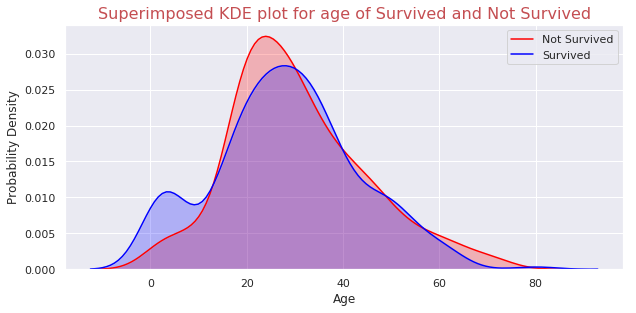

In [584]:
# Age distibution
figure, myaxis = plt.subplots(figsize=(10, 4.5))

preimputation=sns.kdeplot(data=train["Age"][(train["Survived"] == 0) & (
    train["Age"].notnull())], kernel='gau', ax=myaxis, color="Red", shade=True, legend=True)

preimputation=sns.kdeplot(data=train["Age"][(train["Survived"] == 1) & (
    train["Age"].notnull())], kernel='gau', ax=myaxis, color="Blue", shade=True, legend=True)

myaxis.set_xlabel("Age")
myaxis.set_ylabel("Probability Density")
myaxis.legend(["Not Survived", "Survived"], loc='upper right')
myaxis.set_title("Superimposed KDE plot for age of Survived and Not Survived",
                 loc='center', fontdict={'fontsize': 16}, color='r')

In [585]:
copy5 = train.copy()
missing_age_rows2 = copy5.Age.isna()
missing_age_rows2


0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [586]:
age_by_pclass_SibSp = copy5.groupby(['Pclass', 'SibSp']).median()['Age']
age_by_pclass_SibSp

Pclass  SibSp
1       0        37.0
        1        38.0
        2        44.0
        3        23.0
2       0        30.0
        1        29.0
        2        23.5
        3        30.0
3       0        26.0
        1        25.0
        2        19.5
        3         6.0
        4         6.5
        5        11.0
        8         NaN
Name: Age, dtype: float64

In [587]:
age_by_pclass_SibSp[1].index.tolist()
age_by_pclass_SibSp[3][8] = age_by_pclass_SibSp[3][5] 
age_by_pclass_SibSp

[0, 1, 2, 3]

Pclass  SibSp
1       0        37.0
        1        38.0
        2        44.0
        3        23.0
2       0        30.0
        1        29.0
        2        23.5
        3        30.0
3       0        26.0
        1        25.0
        2        19.5
        3         6.0
        4         6.5
        5        11.0
        8        11.0
Name: Age, dtype: float64

In [588]:
for pclass in range(1, 4):
    for siblings in age_by_pclass_SibSp[pclass].index.tolist():
        print('Median age of Pclass {} with {} siblings: {}'.format(pclass, siblings, age_by_pclass_SibSp[pclass][siblings]))
print('Median age of all passengers: {}'.format(copy5['Age'].median()))


Median age of Pclass 1 with 0 siblings: 37.0
Median age of Pclass 1 with 1 siblings: 38.0
Median age of Pclass 1 with 2 siblings: 44.0
Median age of Pclass 1 with 3 siblings: 23.0
Median age of Pclass 2 with 0 siblings: 30.0
Median age of Pclass 2 with 1 siblings: 29.0
Median age of Pclass 2 with 2 siblings: 23.5
Median age of Pclass 2 with 3 siblings: 30.0
Median age of Pclass 3 with 0 siblings: 26.0
Median age of Pclass 3 with 1 siblings: 25.0
Median age of Pclass 3 with 2 siblings: 19.5
Median age of Pclass 3 with 3 siblings: 6.0
Median age of Pclass 3 with 4 siblings: 6.5
Median age of Pclass 3 with 5 siblings: 11.0
Median age of Pclass 3 with 8 siblings: 11.0
Median age of all passengers: 28.0


In [589]:
copy5['Age'] = copy5.groupby(['Pclass', 'SibSp'])[
    'Age'].apply(lambda x: x.fillna(x.median()))

copy5['Age'] = copy5.Age.fillna(11) 
copy5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0.5, 0, 'Age')

Text(0, 0.5, 'Probability Density')

Text(0.5, 1.0, 'Superimposed KDE plot for age of not survived: pre-imputation vs after-imputation')

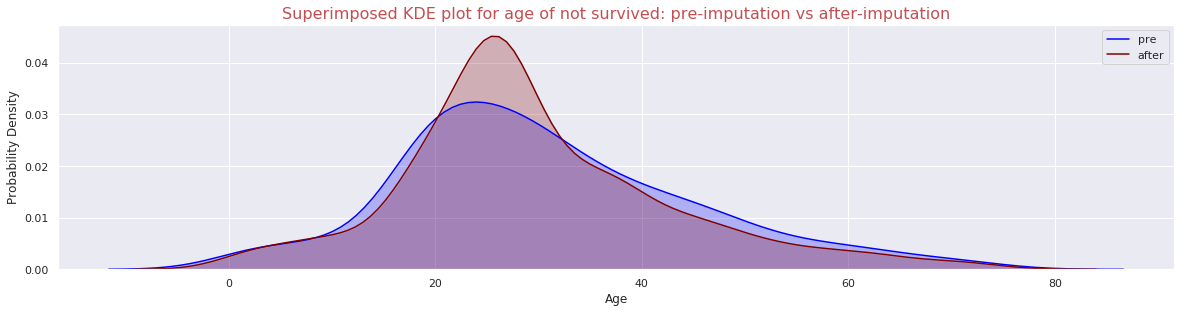

In [590]:
# Age distibution
figure, myaxis = plt.subplots(figsize=(20, 4.5))

preimputation=sns.kdeplot(data=train["Age"][(train["Survived"] == 0) & (
    train["Age"].notnull())], kernel='gau', ax=myaxis, color="Blue", shade=True, legend=True)

afterimputation=sns.kdeplot(data=copy5["Age"][(copy5["Survived"] == 0) & (
    copy5["Age"].notnull())], kernel='gau', ax=myaxis, color="maroon", shade=True, legend=True)

myaxis.set_xlabel("Age")
myaxis.set_ylabel("Probability Density")
myaxis.legend(["pre", "after"], loc='upper right')
myaxis.set_title("Superimposed KDE plot for age of not survived: pre-imputation vs after-imputation",
                 loc='center', fontdict={'fontsize': 16}, color='r')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Probability Density')

Text(0.5, 1.0, 'Superimposed KDE plot for age of survived: pre-imputation vs after-imputation')

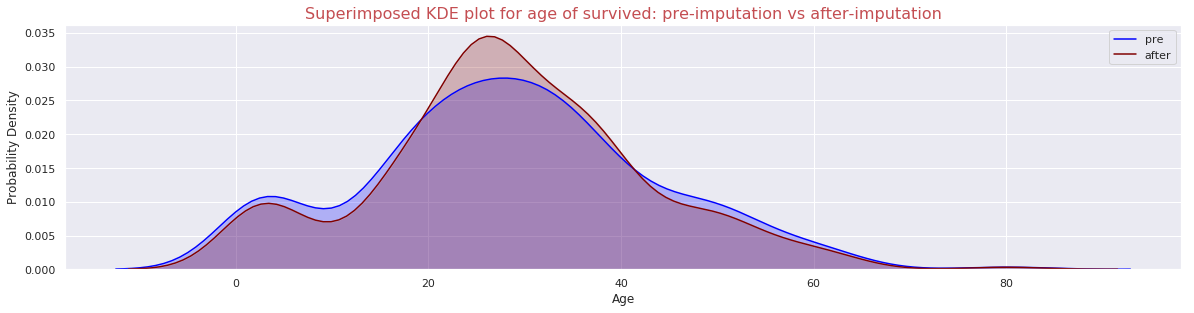

In [591]:
# Age distibution
figure, myaxis = plt.subplots(figsize=(20, 4.5))

preimputation=sns.kdeplot(data=train["Age"][(train["Survived"] == 1) & (
    train["Age"].notnull())], kernel='gau', ax=myaxis, color="Blue", shade=True, legend=True)

afterimputation=sns.kdeplot(data=copy5["Age"][(copy5["Survived"] == 1) & (
    copy5["Age"].notnull())], kernel='gau', ax=myaxis, color="maroon", shade=True, legend=True)

myaxis.set_xlabel("Age")
myaxis.set_ylabel("Probability Density")
myaxis.legend(["pre", "after"], loc='upper right')
myaxis.set_title("Superimposed KDE plot for age of survived: pre-imputation vs after-imputation",
                 loc='center', fontdict={'fontsize': 16}, color='r')


In [592]:
copy2 = train.copy() 
copy2['Age'].fillna(copy2['Age'].median(),inplace = True)

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Probability Density')

Text(0.5, 1.0, 'Superimposed KDE plot for age of not survived: pre-imputation vs after-imputation')

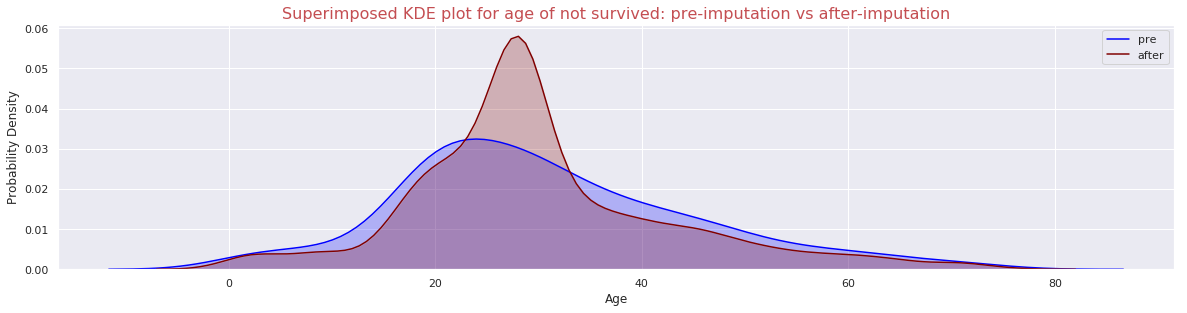

In [593]:
# Age distibution
figure, myaxis = plt.subplots(figsize=(20, 4.5))

preimputation=sns.kdeplot(data=train["Age"][(train["Survived"] == 0) & (
    train["Age"].notnull())], kernel='gau', ax=myaxis, color="Blue", shade=True, legend=True)


median1=sns.kdeplot(data=copy2["Age"][(copy2["Survived"] == 0) & (
    copy2["Age"].notnull())], kernel='gau', ax=myaxis, color="maroon", shade=True, legend=True)



myaxis.set_xlabel("Age")
myaxis.set_ylabel("Probability Density")
myaxis.legend(["pre", "after"], loc='upper right')
myaxis.set_title("Superimposed KDE plot for age of not survived: pre-imputation vs after-imputation",
                 loc='center', fontdict={'fontsize': 16}, color='r')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Probability Density')

Text(0.5, 1.0, 'Superimposed KDE plot for age of survived: pre-imputation vs after-imputation')

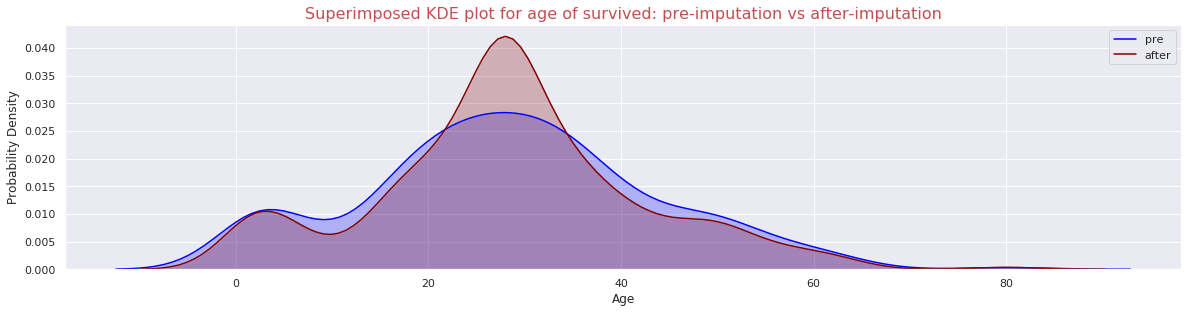

In [594]:
# Age distibution
figure, myaxis = plt.subplots(figsize=(20, 4.5))

preimputation=sns.kdeplot(data=train["Age"][(train["Survived"] == 1) & (
    train["Age"].notnull())], kernel='gau', ax=myaxis, color="Blue", shade=True, legend=True)

median1=sns.kdeplot(data=copy2["Age"][(copy2["Survived"] == 1) & (
    copy2["Age"].notnull())], kernel='gau', ax=myaxis, color="maroon", shade=True, legend=True)

myaxis.set_xlabel("Age")
myaxis.set_ylabel("Probability Density")
myaxis.legend(["pre", "after"], loc='upper right')
myaxis.set_title("Superimposed KDE plot for age of survived: pre-imputation vs after-imputation",
                 loc='center', fontdict={'fontsize': 16}, color='r')

In [595]:
train = copy5

In [596]:
test_age_by_pclass_SibSp = Test.groupby(['Pclass', 'SibSp']).median()['Age']
test_age_by_pclass_SibSp
Test['Age'] = Test.groupby(['Pclass', 'SibSp'])['Age'].apply(lambda x: x.fillna(x.median()))
Test.info()

Pclass  SibSp
1       0        39.0
        1        46.0
        2        55.0
        3        28.0
2       0        27.0
        1        29.0
        2        21.0
3       0        24.0
        1        20.0
        2        19.5
        3        29.0
        4        11.5
        5        10.0
        8        14.5
Name: Age, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [597]:
from collections import Counter

def detect_outliers(df, n, features):
    outliers_indices = [] #create a empty list to keep track of the passenger row number.
    for col in features:
        # 1st quartile (25%)
        Q1 = np.nanpercentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.nanpercentile(df[col], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step)
                              | (df[col] > Q3 + outlier_step)].index
        
        print(col,Q1-outlier_step,Q3+outlier_step)
        # append the found outlier indices for col to the list of outlier indices
        outliers_indices.extend(outlier_list_col)
        
    print(outliers_indices)
    
    # select observations containing more than 2 outliers
    outliers_indices = Counter(outliers_indices)
    multiple_outliers = list(k for k, v in outliers_indices.items() if v > n)
    
    return multiple_outliers


Outliers_to_drop = detect_outliers(train, 2, ["Age", "SibSp", "Parch", "Fare"])


Age -0.5 59.5
SibSp -1.5 2.5
Parch 0.0 0.0
Fare -26.724 65.6344
[33, 54, 96, 116, 170, 252, 275, 280, 326, 366, 438, 456, 483, 493, 545, 555, 570, 587, 625, 630, 672, 684, 694, 745, 829, 851, 7, 16, 24, 27, 50, 59, 63, 68, 71, 85, 88, 119, 159, 164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341, 374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787, 792, 813, 819, 824, 846, 850, 863, 7, 8, 10, 13, 16, 24, 25, 27, 43, 50, 54, 58, 59, 63, 65, 68, 71, 78, 86, 88, 93, 97, 98, 102, 118, 119, 124, 128, 136, 140, 145, 147, 148, 153, 155, 159, 160, 164, 165, 166, 167, 171, 172, 175, 176, 180, 182, 183, 184, 188, 193, 197, 201, 205, 229, 233, 237, 247, 248, 251, 254, 255, 259, 261, 262, 266, 268, 272, 273, 278, 279, 297, 299, 305, 311, 312, 314, 318, 319, 323, 324, 328, 329, 332, 340, 341, 348, 352, 356, 360, 362, 374, 377, 381, 386, 390, 394, 407, 409, 416, 417, 419, 423, 424, 435, 436, 437, 438, 440, 445, 446, 448, 450, 469, 472, 479, 480, 485, 489, 498, 506, 523, 529, 

In [598]:
Outliers_to_drop

train.loc[Outliers_to_drop]

[438, 587, 745, 27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.00,C23 C25 C27,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.20,B41,C
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.00,B22,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,11.0,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,11.0,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,11.0,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,11.0,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S


In [599]:
def outlier_treatment(datacolumn):
    sorted(datacolumn) #must sort data first since we dealing with quartile ranges.
    Q1, Q3 = np.nanpercentile(datacolumn,[25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+ (1.5*IQR)
    return lower_range, upper_range

print('Upper and Lower bound for Age:',outlier_treatment(train.Age), sep = '\n')
print('Upper and Lower bound for Fare:',outlier_treatment(train.Fare), sep = '\n')
print('Upper and Lower bound for Parch:',outlier_treatment(train.Parch), sep = '\n')
print('Upper and Lower bound for Siblings:',outlier_treatment(train.SibSp), sep = '\n')

Upper and Lower bound for Age:
(-0.5, 59.5)
Upper and Lower bound for Fare:
(-26.724, 65.6344)
Upper and Lower bound for Parch:
(0.0, 0.0)
Upper and Lower bound for Siblings:
(-1.5, 2.5)


In [600]:
print('Number of Unique values for Name is', len(train.Name.unique()))
print('Number of Unique values for PassengerID is', len(train.PassengerId.unique()))
print('Number of Unique values for Fare is', len(train.Fare.unique()))
print('Number of Unique values for Survived is', len(train.Survived.unique()))
print('Number of Unique values for Pclass is', len(train.Pclass.unique()))
print('Number of Unique values for Parch is', len(train.Parch.unique()))
print('Number of Unique values for SibSp is', len(train.SibSp.unique()))
print('Number of Unique values for Embarked is', len(train.Embarked.unique()))
print('Number of Unique values for Cabin is', len(train.Cabin.unique()))
print('Number of Unique values for Sex is', len(train.Sex.unique()))
print('Number of Unique values for Ticket is', len(train.Ticket.unique()))

Number of Unique values for Name is 891
Number of Unique values for PassengerID is 891
Number of Unique values for Fare is 248
Number of Unique values for Survived is 2
Number of Unique values for Pclass is 3
Number of Unique values for Parch is 7
Number of Unique values for SibSp is 7
Number of Unique values for Embarked is 3
Number of Unique values for Cabin is 148
Number of Unique values for Sex is 2
Number of Unique values for Ticket is 681


In [601]:
train.drop(["PassengerId"],inplace=True,axis=1)
Test.drop(["PassengerId"],inplace=True,axis=1)

In [602]:
groupby_pclass_ticket= train.groupby(["Pclass","Ticket"])
#for key, item in groupby_pclass_ticket:
    #groupby_pclass_ticket.get_group(key)
    
#groupby_pclass_ticket.describe(include = 'all')    

In [603]:
train.drop(["Ticket"],inplace=True,axis=1)
Test.drop(["Ticket"],inplace=True,axis=1)

In [604]:
train.Name.head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [605]:
# Create function that take name and separates it into title, family name and deletes all puntuation from name column:
def name_sep(data):
    families=[]
    titles = []
    new_name = []
    #for each row in dataset:
    for i in range(len(data)):
        name = data.iloc[i]
        # extract name inside brakets into name_bracket:
        if '(' in name:
            name_no_bracket = name.split('(')[0] 
        else:
            name_no_bracket = name
            
        family = name_no_bracket.split(",")[0]
        title = name_no_bracket.split(",")[1].strip().split(" ")[0]
        
        #remove punctuations except brackets:
        for c in string.punctuation:
            name = name.replace(c,"").strip()
            family = family.replace(c,"").strip()
            title = title.replace(c,"").strip()
            
        families.append(family)
        titles.append(title)
        new_name.append(name)
            
    return families, titles, new_name 

In [606]:
train['Surname'], train['Title'], train['Newname']  = name_sep(train.Name)
Test['Surname'], Test['Title'], Test['Newname'] = name_sep(Test.Name)
train.head()
train.Title.value_counts()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Surname,Title,Newname
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Braund,Mr,Braund Mr Owen Harris
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Cumings,Mrs,Cumings Mrs John Bradley Florence Briggs Thayer
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Heikkinen,Miss,Heikkinen Miss Laina
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Futrelle,Mrs,Futrelle Mrs Jacques Heath Lily May Peel
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Allen,Mr,Allen Mr William Henry


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Don           1
Capt          1
Lady          1
Mme           1
Ms            1
Sir           1
the           1
Jonkheer      1
Name: Title, dtype: int64

In [607]:
train['Title'] = train['Title'].replace(['Ms', 'Mlle'],'Miss')
train['Title'] = train['Title'].replace(['Mme'],'Mrs')
train['Title'] = train['Title'].replace(['Dr','Rev','the','Jonkheer','Lady','Sir', 'Don'],'Nobles')
train['Title'] = train['Title'].replace(['Major','Col', 'Capt'],'Navy')
train.Title.value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Nobles     18
Navy        5
Name: Title, dtype: int64

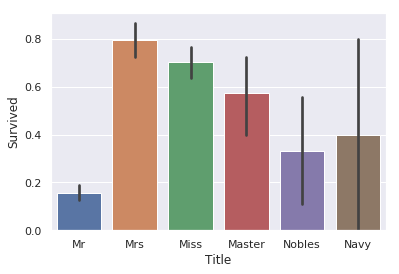

In [608]:
sns.barplot(x = 'Title', y = 'Survived', data = train)

In [609]:
nobles_survival = train[train.Title == "Nobles"].groupby(['Sex']).Survived.value_counts()
nobles_survival

Sex     Survived
female  1            3
male    0           12
        1            3
Name: Survived, dtype: int64

In [610]:
Test.Title.value_counts()

Test['Title'] = Test['Title'].replace(['Ms','Dona'],'Miss')
Test['Title'] = Test['Title'].replace(['Dr','Rev'],'Nobles')
Test['Title'] = Test['Title'].replace(['Col'],'Navy')
Test.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

Mr        240
Miss       80
Mrs        72
Master     21
Nobles      3
Navy        2
Name: Title, dtype: int64

In [611]:
print('Missing values in Train set:', train.Cabin.isnull().sum())
print('Missing values in Test set:', Test.Cabin.isnull().sum())

Missing values in Train set: 687
Missing values in Test set: 327


In [612]:
train.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
E101           3
              ..
E34            1
C32            1
D21            1
E50            1
C128           1
Name: Cabin, Length: 147, dtype: int64

In [613]:
def cabin_sep(data_cabin):
    cabin_type = []

    for i in range(len(data_cabin)):

            if data_cabin.isnull()[i] == True: 
                cabin_type.append('M') #missing cabin = M 
            else:    
                cabin = data_cabin[i]
                cabin_type.append(cabin[:1]) 
            
    return cabin_type

# apply cabin sep on test and train set:
#train['cabin_type'] = cabin_sep(train.Cabin)
#Test['cabin_type'] = cabin_sep(Test.Cabin)


#train.head()

In [614]:
train['Cabin'] = train['Cabin'].fillna('M').astype(str).apply(lambda cabin: cabin[0])

In [615]:
idx = train[train['Cabin'] == 'T'].index
train.loc[idx, 'Cabin'] = 'A'
train.Cabin.value_counts()
Test['Cabin'] = Test['Cabin'].fillna('M').astype(str).apply(lambda cabin: cabin[0])
Test.Cabin.value_counts()

M    687
C     59
B     47
D     33
E     32
A     16
F     13
G      4
Name: Cabin, dtype: int64

M    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64

In [616]:
train_categorical_features = ['Pclass', 'Sex','Title','Cabin', 'Embarked']

for feature in train_categorical_features:
    dummies = pd.get_dummies(train[feature]).add_prefix(feature + '_')
    train = train.join(dummies)
    
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Surname,Title,Newname,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Navy,Title_Nobles,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,M,S,Braund,Mr,Braund Mr Owen Harris,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C,Cumings,Mrs,Cumings Mrs John Bradley Florence Briggs Thayer,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,M,S,Heikkinen,Miss,Heikkinen Miss Laina,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S,Futrelle,Mrs,Futrelle Mrs Jacques Heath Lily May Peel,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,M,S,Allen,Mr,Allen Mr William Henry,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,M,S,Montvila,Nobles,Montvila Rev Juozas,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B,S,Graham,Miss,Graham Miss Margaret Edith,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,23.4500,M,S,Johnston,Miss,Johnston Miss Catherine Helen Carrie,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,C,Behr,Mr,Behr Mr Karl Howell,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [617]:
test_categorical_features = ['Pclass', 'Sex','Title', 'Cabin', 'Embarked']

for feature in test_categorical_features:
    dummies = pd.get_dummies(Test[feature]).add_prefix(feature + '_')
    Test = Test.join(dummies)
    
Test

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Surname,Title,Newname,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Navy,Title_Nobles,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Embarked_C,Embarked_Q,Embarked_S
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,M,Q,Kelly,Mr,Kelly Mr James,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,M,S,Wilkes,Mrs,Wilkes Mrs James Ellen Needs,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,M,Q,Myles,Mr,Myles Mr Thomas Francis,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,M,S,Wirz,Mr,Wirz Mr Albert,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,M,S,Hirvonen,Mrs,Hirvonen Mrs Alexander Helga E Lindqvist,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,24.0,0,0,8.0500,M,S,Spector,Mr,Spector Mr Woolf,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,C,Oliva y Ocana,Miss,Oliva y Ocana Dona Fermina,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,M,S,Saether,Mr,Saether Mr Simon Sivertsen,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
416,3,"Ware, Mr. Frederick",male,24.0,0,0,8.0500,M,S,Ware,Mr,Ware Mr Frederick,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [618]:
#importing from sklearn
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#import xgboost as xgb
from sklearn.metrics import roc_curve, auc
import scikitplot as skplt 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_absolute_error, accuracy_score

In [619]:
drop_column = ['Pclass','Name','Sex','Cabin', 'Embarked','Surname','Title','Newname']
train.drop(drop_column, axis=1, inplace = True)

drop_column = ['Pclass','Name','Sex','Cabin', 'Embarked','Surname','Title','Newname']
Test.drop(drop_column, axis=1, inplace = True)

In [620]:
original_train_set_without_survived = train.drop("Survived", axis=1)
orginal_train_set_with_only_survived = train["Survived"]

In [621]:
x_train, x_test, y_train, y_test = train_test_split(
    original_train_set_without_survived, orginal_train_set_with_only_survived, train_size=0.8, test_size=0.2, random_state=0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(712, 26) (712,)
(179, 26) (179,)


In [622]:
# Feature Scaling
##Standardscaler to transform the data.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

## transforming "train_x"
x_train = sc.fit_transform(x_train)
## transforming "test_x"
x_test = sc.transform(x_test)

## transforming "The testset"
Test = sc.transform(Test)

In [623]:

logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)

print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_test,y_pred),8)))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

So, Our accuracy Score is: 0.82681564


In [624]:
def confusion_matrix_model(model_used):
    cm=confusion_matrix(y_test,model_used.predict(x_test))
    col=["Predicted Dead","Predicted Survived"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Dead","Predicted Survived"]
    cm.index=["Actual Dead","Actual Survived"]
    cm[col]=np.around(cm[col].div(cm[col].sum(axis=1),axis=0),decimals=2)
    return cm

confusion_matrix_model(logreg)

,Predicted Dead,Predicted Survived
Actual Dead,0.85,0.15
Actual Survived,0.22,0.78


LogisticRegression auc is 0.87404480


<Figure size 720x648 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC for Logistic Regression (Titanic)')

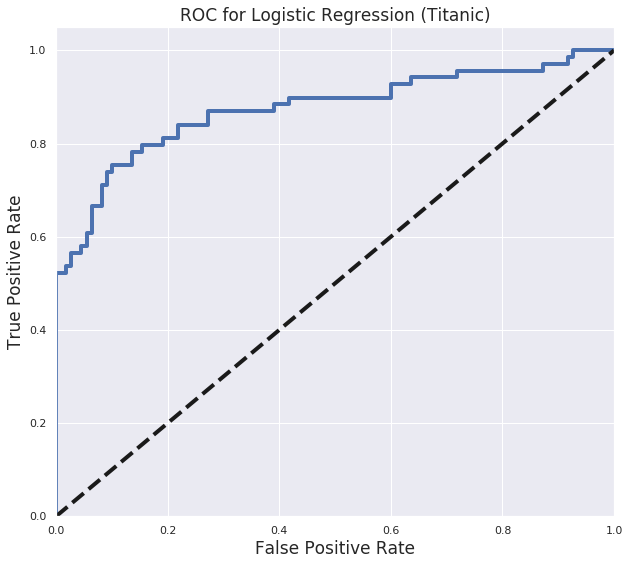

In [625]:
from sklearn.metrics import roc_curve, auc
#plt.style.use('seaborn-pastel')
y_score = logreg.decision_function(x_test) #y_pred_proba = logreg.predict_proba(X_test)[:, 1] same as this

FPR, TPR, THR = roc_curve(y_test, y_score) #[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba) same as this
ROC_AUC = auc(FPR, TPR)
print (logreg.__class__.__name__+" auc is %2.8f" % ROC_AUC) #Gives AUC score.

plt.figure(figsize =[10,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 17)
plt.ylabel('True Positive Rate', fontsize = 17)
plt.title('ROC for Logistic Regression (Titanic)', fontsize= 17)
plt.show()

<Figure size 792x648 with 0 Axes>

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

Text(0.5, 1.0, 'Precision Recall Curve for Titanic survivors')

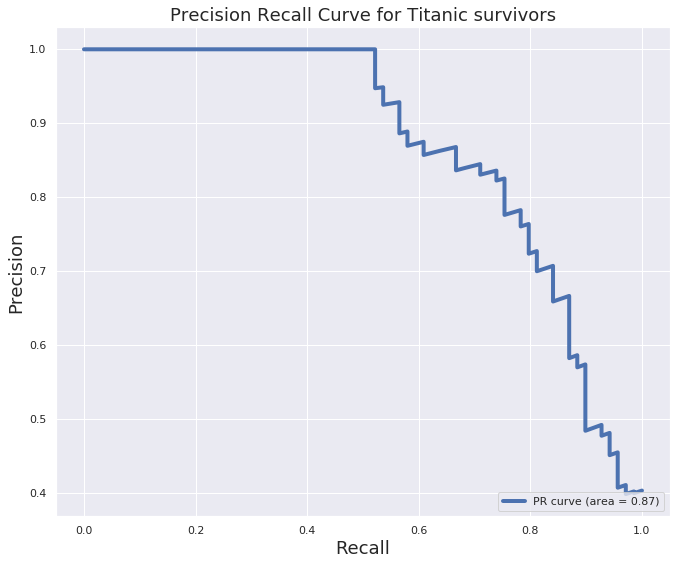

In [626]:
from sklearn.metrics import precision_recall_curve

y_score = logreg.decision_function(x_test)

precision, recall, _ = precision_recall_curve(y_test, y_score)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Titanic survivors', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [627]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [628]:
x = original_train_set_without_survived
y = orginal_train_set_with_only_survived

In [629]:
#normalize it by using our sc previously defined - where sc = StandardScaler()
x = sc.fit_transform(x)

In [630]:
def Acc_score(model):
    return np.mean(cross_val_score(model,x,y,cv=k_fold,scoring="accuracy"))

In [631]:
logreg2=LogisticRegression()

print("Accuracy Scores: " + format(cross_val_score(logreg2,x,y,cv=k_fold,scoring="accuracy")))
print(" ") #leave empty line
print("Mean Accuracy Score: " + str(Acc_score(logreg2)))
print(" ")
print("Standard Deviation:", cross_val_score(logreg2,x,y,cv=k_fold,scoring="accuracy").std())

Accuracy Scores: [0.87777778 0.80898876 0.80898876 0.82022472 0.80898876 0.80898876
 0.83146067 0.84269663 0.79775281 0.87640449]
 
Mean Accuracy Score: 0.828227215980025
 
Standard Deviation: 0.027330073305794178


In [632]:
scores_auc = cross_val_score(logreg2, x, y, cv=k_fold, scoring='roc_auc')
print("AUC score for 10 fold Cross Validation:", scores_auc)
print(" ")
print("Mean AUC score for 10 fold Cross Validation:", scores_auc.mean())

AUC score for 10 fold Cross Validation: [0.9089995  0.84180791 0.83147942 0.85324948 0.89008363 0.83036707
 0.83333333 0.90378198 0.87948718 0.91388045]
 
Mean AUC score for 10 fold Cross Validation: 0.8686469949449803


In [633]:
def plt_roc_curve(name, model, cv_x_test, cv_y_test, has_proba=True):
    if has_proba:
        fpr,tpr,thr=skplt.metrics.roc_curve(cv_y_test,model.predict_proba(cv_x_test)[:,1])
    else:
        fpr,tpr,thr=skplt.metrics.roc_curve(cv_y_test,model.decision_function(cv_x_test))
    auc= skplt.metrics.auc(fpr,tpr) #x axis is fpr, y axis is tpr

    plt.plot(fpr,tpr,label='ROC curve for %s (AUC = %0.8f)' % (name, auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    #plt.show()
    return fpr, tpr, auc

In [634]:
def run_k_fold(modeller, no_of_folds):
    scores = []
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []
    plt.figure(figsize =[10,9])
    
    k_fold = KFold(n_splits=no_of_folds, shuffle=True, random_state=0)
    fold = 1
    # the below line's x, y is from outside just now.
    #k_fold.split gives you all 10 rounds in a list of tuples [round1, round2,...]
    #each round consists of the rows to be in the training set (90%) and the rows to be in 
    #the test set (10%) for that round. 
    for rounds in k_fold.split(x, y): 
        train_rows = rounds[0]
        test_rows  = rounds[1]
        CV_x_train = x[train_rows]
        CV_y_train = y[train_rows]
        CV_x_test = x[test_rows]
        CV_y_test = y[test_rows]
        model = modeller()
        model.fit(CV_x_train, CV_y_train)
        scores.append(model.score(CV_x_test, CV_y_test))
        curr_fpr, curr_tpr, curr_auc = plt_roc_curve(
            'log reg fold ' + str(fold), model, CV_x_test, CV_y_test)

        tprs.append(np.interp(mean_fpr, curr_fpr, curr_tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(curr_fpr, curr_tpr)
        aucs.append(roc_auc)
        fold += 1

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)  # popn std dev?
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.8f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return np.mean(scores)

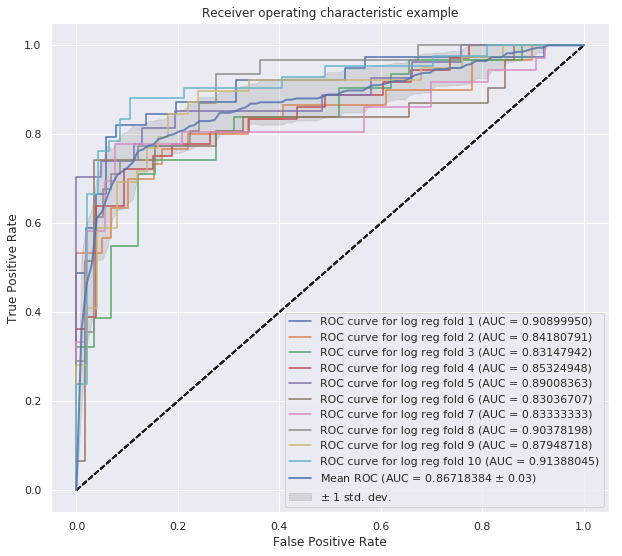

Accuracy Score: 0.828227215980025


In [635]:
accuracy_score = run_k_fold(LogisticRegression, 10)
print("Accuracy Score:", accuracy_score)
#notice that the mean roc score is different from the previous code. this is because
#we are finding the AUC of the MEAN ROC curves. In a sense we have a 11th curve called
#the mean roc curve and we find the area under that 11th curve. While the previous code
#just mean the 10 auc of the respective rocs.

In [636]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
max_depth = range(1,30)
#max_feature = list(range(1,x.shape[1]+1)) #dynamic coding
max_feature = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,'auto'] #how one knows start at 21


criterion=["entropy", "gini"]

param = {'max_depth':max_depth, 
         'max_features':max_feature, 
         'criterion': criterion}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                                param_grid = param, 
                                 verbose=False, 
                                 cv=KFold(n_splits=10, shuffle=True, random_state=42),
                                n_jobs = -1)
grid.fit(x, y) 


print( grid.best_params_)
print(" ")
print (grid.best_score_)
print(" ")
print (grid.best_estimator_)


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                    

{'criterion': 'gini', 'max_depth': 8, 'max_features': 10}
 
0.8395061728395061
 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


In [637]:
dectree_grid = grid.best_estimator_
dectree_grid.score(x,y)

0.8810325476992144

In [638]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, n_estimators=140,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=True)

rf_model.fit(x,y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, n_estimators=140,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=True)

In [640]:
rf_model.score(x,y)

0.8742985409652076

In [641]:
Test = sc.fit_transform(Test)
Test1 = pd.read_csv("../input/titanic/test.csv")

output3 = pd.DataFrame({"PassengerId": Test1.PassengerId, "Survived":rf_model.predict(Test)})
output3.PassengerId = output3.PassengerId.astype(int)
output3.Survived = output3.Survived.astype(int)

output3.to_csv("output3.csv", index=False)
print("Your submission was successfully saved!")
output3.head(10)

Your submission was successfully saved!


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
